In [103]:
import numpy as np
import math

#starting capital
a0 = 100000

#starting subscribers
n0 = 1000

#monthly fee
d = 133

#number of months to check for bankruptcy
T = 120

#claim amount, uses exponential distribution with minimum cost
def F(distribution = 0, average = 38400, minAmount = 500):
    adjAverage = average - minAmount
    if distribution == 0:
        # exponential distribution
        return minAmount + np.random.exponential(average - minAmount)
    elif distribution == 1:
        # log-normal distribution (expected value = e^(mu+sigma^2/2))
        return minAmount + adjAverage*np.random.lognormal(0,0.5)/math.exp(1/8)
    elif distribution == 2:
        # gamma distribution
        return minAmount + np.random.gamma(4,adjAverage/4)
    elif distribution == 3:
        # weibull distribution (expected value = gamma(1/a + 1))
        return minAmount + adjAverage*np.random.weibull(2)/math.gamma(1/2+1)
    else:
        return F(0)

#names of the distributions
F_names = ["Exponential","Log-Normal","Gamma","Weibull"]

#Distribution number
D = 0
    
#rate one subscriber leaves
c1 = 0.0069
#rate one subscriber joins
c2 = 0.0072
#rate one claim occurs
c3 = 0.0015

#rate at which subscribers leave
mu = n0 * c1
#rate at which subscribers join
nu = n0 * c2
#rate at which claims occur
lam = n0 * c3

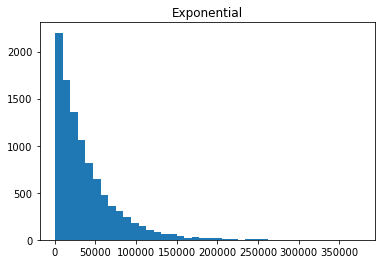

Exponential Distribution Average: 38280.81994703068


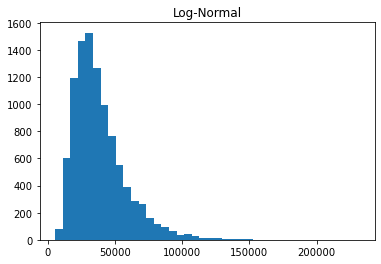

Log-Normal Distribution Average: 38680.4480891577


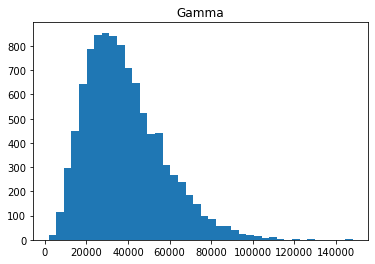

Gamma Distribution Average: 38382.32756459464


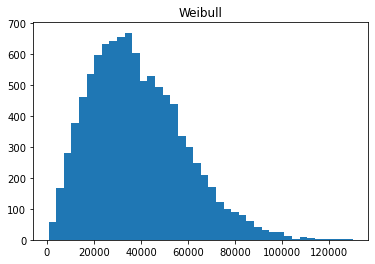

Weibull Distribution Average: 38437.25021402569


In [104]:
import matplotlib.pyplot as plt

runs = 10000
dist = np.zeros(runs)
for i in range(4):
    sum = 0
    for j in range(runs):
        dist[j] = F(i)
        sum += dist[j]
    plt.hist(dist, bins=40)
    plt.title(F_names[i])
    plt.show()
    print(f'{F_names[i]} Distribution Average: {sum/runs}')

In [105]:
def R(a,n,d,T,F,c1,c2,c3,D):
    success = 1
    
    for i in range(T):
        #update rates based on number of subscribers
        mu = n*c1
        nu = n*c2
        lam = n*c3
        
        #randomly generate joining/leaving subscribers
        num_join = np.random.poisson(nu)
        num_leave = np.random.exponential(1/mu)
        
        #update total subscribers
        n = n + num_join - num_leave
        
        #randomly generate number of crashes
        num_crashes = np.random.poisson(lam)
        
        #calculate total damage
        damage_total = 0
        for i in range(num_crashes):
            damage_total += F(D)
        
        #update capital available
        a = a + n*d - damage_total
        
        #make sure not negative number of subscribers
        if n < 0:
            n = 0
        
        if a < 0:
            success = 0
            break
    
    return(success)

print(R(a0,n0,d,T,F,c1,c2,c3,D))

1


In [106]:
def runTrials(num,a,n,d,T,F,c1,c2,c3,D):
    S=0
    for k in range (num):
        Y=R(a0,n0,d,T,F,c1,c2,c3,D)
        S=S+Y
    return S

num = 100
S = runTrials(num,a0,n0,d,T,F,c1,c2,c3,D)
print(S)
print(S/num)

97
0.97


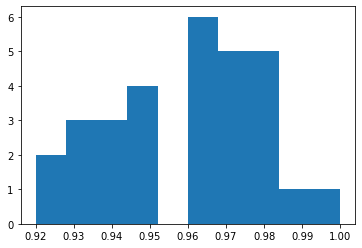

Average success: 0.9583333333333333


In [107]:
import matplotlib.pyplot as plt
def runSimulation(num,numTrials,a,n,d,T,F,c1,c2,c3,D):
    x=np.zeros(num)

    for j in range(num):
        x[j]=runTrials(numTrials,a0,n0,d,T,F,c1,c2,c3,D)/numTrials

    plt.hist(x, bins=10)
    plt.show()
    print("Average success: " + str(np.average(x)))
    
runSimulation(30,100,a0,n0,d,T,F,c1,c2,c3,D)

Exponential Distribution Results:


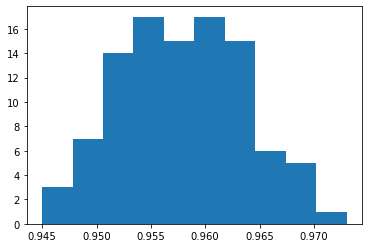

Average success: 0.9578899999999999

Log-Normal Distribution Results:


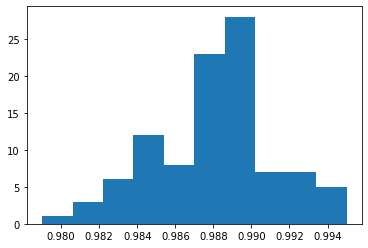

Average success: 0.9879299999999998

Gamma Distribution Results:


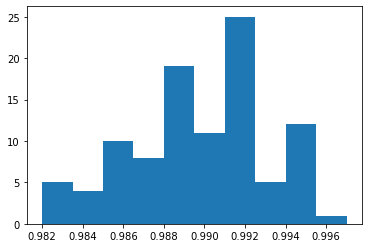

Average success: 0.9895800000000001

Weibull Distribution Results:


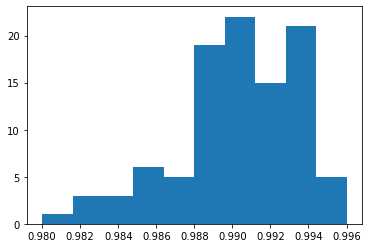

Average success: 0.99025



In [113]:
for i in range(4):
    print(f'{F_names[i]} Distribution Results:')
    runSimulation(30,,a0,n0,d,T,F,c1,c2,c3,i)
    print()